In [1]:
import pandas as pd
import numpy as np
import read_data
import warnings
import first_clustering
import cal_smilar
import match

import tldextract

import altair as alt
from vega_datasets import data
# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
result = pd.read_csv('result1.csv')
valid = pd.read_csv('valid.csv')
train = pd.read_csv('test.csv')
safe_host = pd.read_csv('alexa_100k.txt',names=['host'])

In [3]:
def get_host(x):
    val = tldextract.extract(x)
    return val.domain + '.' + val.suffix

In [4]:
result['original_host'] = result['original_host'].apply(lambda x:get_host(x))

In [35]:
print('result: '+ result['ip_24'].unique())
print('valid: '+ valid['ip_24'].unique())
print('train: '+ train['ip_24'].unique())

['result: 23.15.8' 'result: 104.96.220' 'result: 15.72.238' ...
 'result: 54.86.50' 'result: 54.173.232' 'result: 52.86.117']
['valid: 23.36.33' 'valid: 172.82.206']
['train: 172.82.206' 'train: 23.36.33']


In [5]:
test_ip_1 = valid['ip_24'].unique()
test_ip_2 = [ip for ip in result['ip_24'].unique() if ip not in test_ip_1]

In [6]:
result = result[result['ip_24'].isin(test_ip_2)]
print(len(result))

47852


In [7]:
ans = result[(result['y']=='safe')|(result['y']=='malicious')]
ans_host = ans['original_host'].unique()
safe_host = list(safe_host['host'].values)
same_host = list(set(safe_host)&set(ans_host))
result = result[~result['original_host'].isin(same_host)]

In [8]:
len(result[result['y']=='malicious'])

259

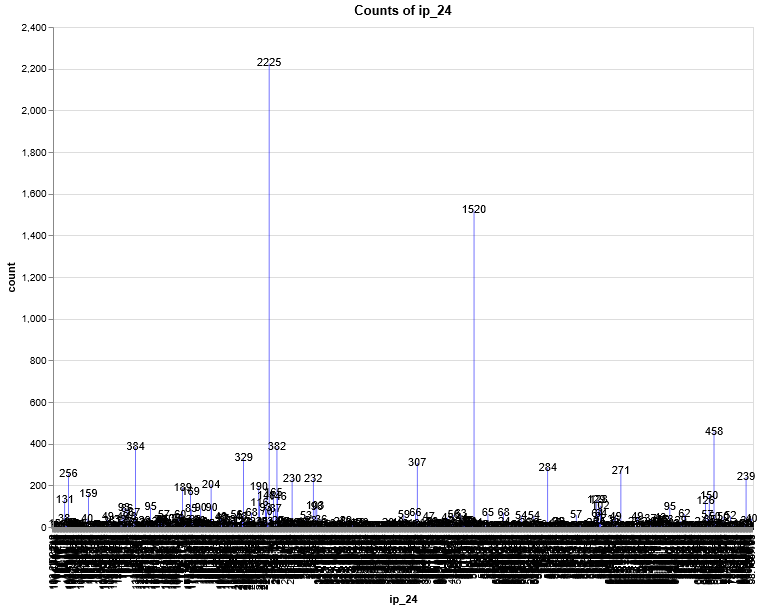

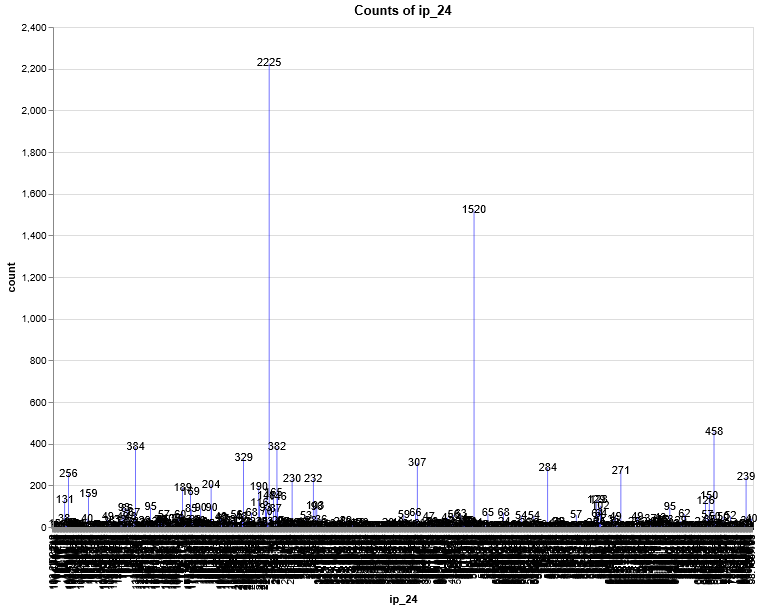

In [40]:
source = result['ip_24'].value_counts().reset_index().rename(columns={'ip_24': 'count', 'index': 'ip_24'})
bars = alt.Chart(source).mark_bar(color='blue').encode(
    x='ip_24',
    y='count:Q',

)
text = bars.mark_text(
    align='center',
    baseline='middle',
#     dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='count:Q'
)
(bars + text).properties(title="Counts of ip_24", width=700,height=500)

In [9]:
x = 0.12
print(len(result[(result['y']=='safe')|(result['y']=='malicious')]))
print("safe dis > " + str(x) + " :" + str(len(result[(result['y']=='safe')&(result['dis']>x)])))
print("safe dis > " + str(x) + " label=1:" +  str(len(result[(result['y']=='safe')&(result['dis']>x)&(result['label']==1)])))
print("safe dis <= " + str(x) + " :" +  str(len(result[(result['y']=='safe')&(result['dis']<=x)])))
print("safe dis <= " + str(x) + " label=1:" +  str(len(result[(result['y']=='safe')&(result['dis']<=x)&(result['label']==1)])))
print("malicious dis > " + str(x) + " :" +  str(len(result[(result['y']=='malicious')&(result['dis']>x)])))
print("malicious dis > " + str(x) + " label=1:" +  str(len(result[(result['y']=='malicious')&(result['dis']>x)&(result['label']==1)])))
print("malicious dis <= " + str(x) + " :" +  str(len(result[(result['y']=='malicious')&(result['dis']<=x)])))
print("malicious dis <= " + str(x) + " label=1:" +  str(len(result[(result['y']=='malicious')&(result['dis']<=x)&(result['label']==1)])))

3958
safe dis > 0.12 :3542
safe dis > 0.12 label=1:181
safe dis <= 0.12 :157
safe dis <= 0.12 label=1:69
malicious dis > 0.12 :235
malicious dis > 0.12 label=1:200
malicious dis <= 0.12 :24
malicious dis <= 0.12 label=1:0


In [ ]:
safe dis > 0.12 :2029
safe dis > 0.12 label=1:75
safe dis <= 0.12 :80
safe dis <= 0.12 label=1:63
malicious dis > 0.12 :403
malicious dis > 0.12 label=1:325
malicious dis <= 0.12 :502
malicious dis <= 0.12 label=1:3

In [10]:
TP = 497 + 325
FN = 411 - 325
FP = 2997 - 70
TN = 8383 - 238

In [11]:
P = TP / (TP + FP)
R = TP / (TP + FN)
F1 = 2*TP / (2*TP + FP + FN)
auc  = (TP + TN) / (TP + FN + FP + TN)
print(P,R,F1,auc)

0.2192584689250467 0.9052863436123348 0.35301696371054325 0.7484974958263773


In [ ]:
### 
    精确率            召回率               F1_Score          准确率
0.1
    0.842374616171955 0.9093922651933701 0.8746014877789585 0.9216987392169874
0.12
    0.8421588594704684 0.9138121546961326 0.8765235824059353 0.9226940942269409
    
0.15
    0.683429513602638 0.9160220994475138 0.7828139754485364 0.847378898473789
0.2
    0.3733751680860601 0.9204419889502763 0.53125 0.5138888888888888
0.25
    0.29537729435757987 0.9602209944751381 0.45178060826618144 0.30026542800265427
    
###

In [62]:
6831+1899+401+278+556

9965

In [151]:
ans = result[(result['y']=='safe')]
ans_host = ans['original_host'].unique()
safe_host = list(safe_host['host'].values)
same_host = list(set(safe_host)&set(ans_host))
result = result[~result['original_host'].isin(same_host)]

In [175]:
len(safe_host)

1086790

In [177]:
len(result[(result['y']=='safe')])

3428

In [160]:
result[(result['y']=='safe')&(result['dis']<=x)]['original_host'].unique()

array(['www.hp.com', 'www8.hp.com', 'rps-svcs.sun.com',
       'ocsp.digicert.com', 'www.jildorshoes.com', 'translate.google.com',
       'images.scanalert.com', 'www.google.com', 'um.simpli.fi',
       'track.eyeviewads.com', 'rp.gwallet.com', 'l.betrad.com',
       'www.preemiestore.com', 's2.symcb.com', 'login.live.com',
       'global.fncstatic.com', 'pagead2.googlesyndication.com',
       'static.adsafeprotected.com', 'dt.adsafeprotected.com',
       'ds-aksb-a.akamaihd.net', 'cdn.cxense.com', 'idsync.rlcdn.com',
       'a.postrelease.com', 'brightcove.vo.llnwd.net', 'ap.lijit.com',
       'ad.doubleclick.net', 'www.microsoft.com', 'vop.sundaysky.com',
       'cm.g.doubleclick.net', 'web.mit.edu', 'download.mozilla.org',
       'www1.cbn.com', 'www.cbn.com', 'metrics.brightcove.com',
       'c.brightcove.com', 'us.fluke.com', 'www.ire.org',
       'www.gstatic.com', 'www.msn.com', 'o.aolcdn.com',
       'widgets.outbrain.com', 'cdn.taboola.com', 'ocsp.usertrust.com',
       'ocsp.

In [163]:
safe_host = pd.read_csv('safe_host.csv',names=['host'])
safe_host = list(safe_host['host'].values)

In [167]:
safe_host = pd.Series(safe_host)

In [169]:
safe_host.to_csv('safe_host_add.csv',index=False)

In [190]:
safe_host

['shengen-visas.ru',
 'neilmurraydesign.co.uk',
 'princeclassified.com',
 'pengke.com',
 'central-ppk.ru',
 'aricent.com',
 'dramaqu.net',
 'limitnetwork.com',
 'spytravellers.com',
 'france5.fr',
 'itr2010.org',
 'leho.com',
 'unicart.com',
 'greetzap.com',
 'hmveng.co.uk',
 'chinaregistry.org.sg',
 'scandinaviawolf.com',
 'corepacks.com',
 '200baliv.org',
 'bloggerbuster.com\r\r\n',
 'npmjs.com',
 'loterianacional.gob.do',
 'cos25tv.com',
 'stroybud.com',
 'premiosjuventud.com',
 'puskesmasmakale.blogspot.com',
 'safaraval24.ir',
 'ar.estate',
 'britanico.edu.pe',
 'maclickmoneys.com',
 'polliana.com',
 'eltra-trade.com',
 'ekmpowershop.com\r\r\n',
 'goodforvn.com',
 'igrul-ka.ru',
 'popdust.com',
 'caminandoentredinosaurios.com',
 'amoma.com',
 'namdonews.com',
 'ilglobo.com.au',
 'importgenius.com',
 'hollywoodhistoricphotos.com',
 'medik-ekt.ru',
 'e-stradivarius.net',
 'govexam.in',
 'azonitblog2.wordpress.com',
 'icanportal.org',
 'denx.su',
 'manggear.com',
 'vidtubeporn.com',


In [229]:
len(result)

17398